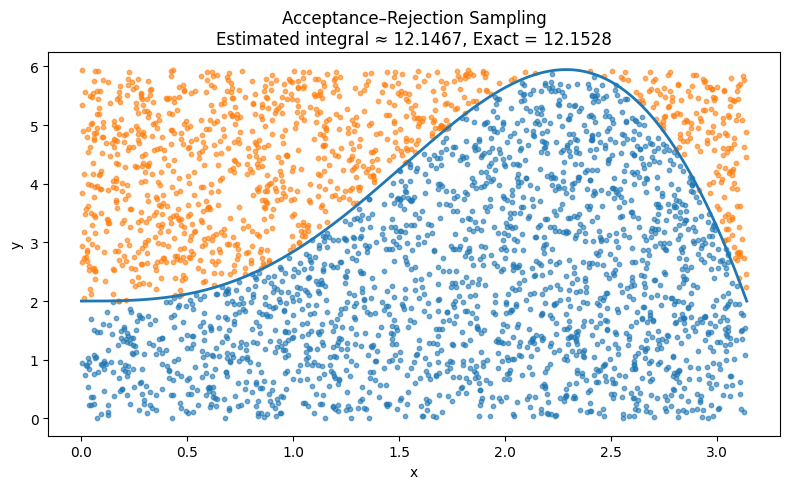

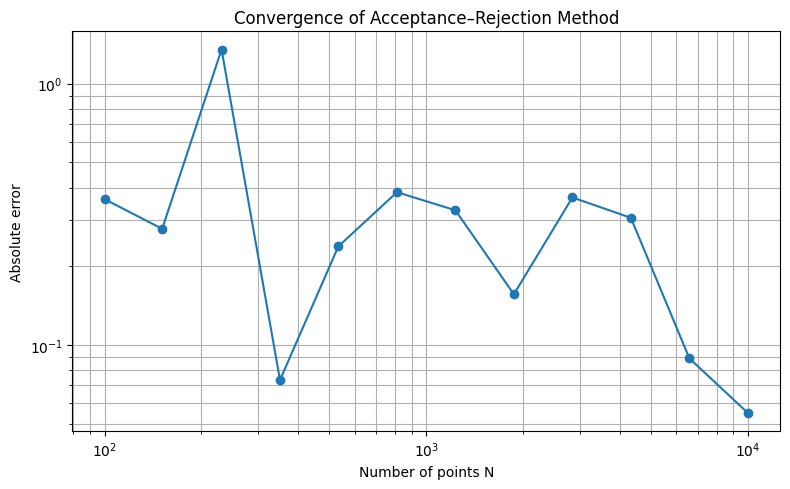

(np.float64(12.146736936292921), np.float64(12.152789708268944))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate: f(x) = x^2*sin(x) + 2
def f(x):
    return x**2 * np.sin(x) + 2

# Integration interval
a, b = 0, np.pi

# Exact integral computation
# ∫ x^2 sin x dx = -x^2 cos x + 2x sin x + 2 cos x
def exact_integral(a, b):
    F = lambda x: -x**2 * np.cos(x) + 2*x*np.sin(x) + 2*np.cos(x)
    return (F(b) - F(a)) + 2*(b - a)  # the +2 term integrates to 2x

I_exact = exact_integral(a, b)

# Acceptance–Rejection with a chosen N
N = 3000
x_dense = np.linspace(a, b, 2000)
fmax = f(x_dense).max()

xs = np.random.uniform(a, b, N)
ys = np.random.uniform(0, fmax, N)

accepted = ys < f(xs)
rejected = ~accepted

# Estimated integral
I_est = (b - a) * fmax * np.mean(accepted)

# ---- Plot 1: function + accepted/rejected points ----
plt.figure(figsize=(8,5))
plt.plot(x_dense, f(x_dense), linewidth=2)
plt.scatter(xs[accepted], ys[accepted], s=10, alpha=0.6)
plt.scatter(xs[rejected], ys[rejected], s=10, alpha=0.6)
plt.title(f"Acceptance–Rejection Sampling\nEstimated integral ≈ {I_est:.4f}, Exact = {I_exact:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# ---- Error as a function of N ----
Ns = np.logspace(2, 4, 12, dtype=int)  # from 1e2 to 1e4
errors = []

for Ni in Ns:
    xs_i = np.random.uniform(a, b, Ni)
    ys_i = np.random.uniform(0, fmax, Ni)
    acc_i = ys_i < f(xs_i)
    I_est_i = (b - a) * fmax * np.mean(acc_i)
    errors.append(abs(I_est_i - I_exact))

errors = np.array(errors)

# ---- Plot 2: error vs N ----
plt.figure(figsize=(8,5))
plt.loglog(Ns, errors, marker="o")
plt.xlabel("Number of points N")
plt.ylabel("Absolute error")
plt.title("Convergence of Acceptance–Rejection Method")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

I_est, I_exact